<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Wrangling Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be performing data wrangling.


## Objectives


In this lab you will perform the following:


*   Identify duplicate values in the dataset.

*   Remove duplicate values from the dataset.

*   Identify missing values in the dataset.

*   Impute the missing values in the dataset.

*   Normalize data in the dataset.


<hr>


## Hands on Lab


Import pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv")

## Finding duplicates


In this section you will identify duplicate values in the dataset.


Find how many duplicate rows exist in the dataframe.


In [3]:
df.shape

(11552, 85)

In [4]:
# your code goes here
#df = df[df.duplicated()]
print('Number of Duplicates:', df.duplicated().sum())

Number of Duplicates: 154


In [5]:
df['Respondent'].duplicated().sum()

154

## Removing duplicates


Remove the duplicate rows from the dataframe.


In [6]:
# your code goes here
df.drop_duplicates(inplace=True)

Verify if duplicates were actually dropped.


In [7]:
# your code goes here
print('Number of Duplicates:', df.duplicated().sum())

Number of Duplicates: 0


In [8]:
df.shape

(11398, 85)

In [9]:
df['Respondent'].shape[0]

11398

In [10]:
df['EdLevel'].isnull().sum()

112

In [11]:
df['Country'].isnull().sum()

0

## Finding Missing values


Find the missing values for all columns.


In [12]:
# your code goes here
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.isnull().sum())

Respondent                   0
MainBranch                   0
Hobbyist                     0
OpenSourcer                  0
OpenSource                  81
Employment                   0
Country                      0
Student                     51
EdLevel                    112
UndergradMajor             737
EduOther                   164
OrgSize                     96
DevType                     65
YearsCode                    9
Age1stCode                  13
YearsCodePro                16
CareerSat                    0
JobSat                       1
MgrIdiot                   493
MgrMoney                   497
MgrWant                    493
JobSeek                      0
LastHireDate                 0
LastInt                    413
FizzBuzz                    37
JobFactors                   3
ResumeUpdate                39
CurrencySymbol               0
CurrencyDesc                 0
CompTotal                  809
CompFreq                   206
ConvertedComp              816
WorkWeek

Find out how many rows are missing in the column 'WorkLoc'


In [13]:
# your code goes here
print('Missing rows:', df['WorkLoc'].isnull().sum())

Missing rows: 32


## Imputing missing values


Find the  value counts for the column WorkLoc.


In [14]:
# your code goes here
df['WorkLoc'].value_counts()

Office                                            6806
Home                                              3589
Other place, such as a coworking space or cafe     971
Name: WorkLoc, dtype: int64

Identify the value that is most frequent (majority) in the WorkLoc column.


In [15]:
#make a note of the majority value here, for future reference
print('WorkLoc majority:',df['WorkLoc'].mode())

print('\nConvertedComp mean:',df['ConvertedComp'].mean())
print('ConvertedComp median:',df['ConvertedComp'].median())


WorkLoc majority: 0    Office
dtype: object

ConvertedComp mean: 131596.7316197316
ConvertedComp median: 57745.0


In [16]:
df['Employment'].mode()

0    Employed full-time
dtype: object

In [17]:
df['UndergradMajor'].value_counts()

Computer science, computer engineering, or software engineering          6953
Information systems, information technology, or system administration     794
Another engineering discipline (ex. civil, electrical, mechanical)        759
Web development or web design                                             410
A natural science (ex. biology, chemistry, physics)                       403
Mathematics or statistics                                                 372
A business discipline (ex. accounting, finance, marketing)                244
A social science (ex. anthropology, psychology, political science)        210
A humanities discipline (ex. literature, history, philosophy)             207
Fine arts or performing arts (ex. graphic design, music, studio art)      161
I never declared a major                                                  124
A health science (ex. nursing, pharmacy, radiology)                        24
Name: UndergradMajor, dtype: int64

Impute (replace) all the empty rows in the column WorkLoc with the value that you have identified as majority.


In [18]:
# your code goes here
#df["WorkLoc"].fillna('Office', inplace = True)
import numpy as np
workloc_highest = 'Office'

missing_data = df.isnull()
#print(missing_data.head(5))

print('\nValue counts for missing data in WorkLoc:\n')
print( missing_data['WorkLoc'].value_counts())


print('\nHere are the first 10 rows missing values for WorkLoc:')
print(df[missing_data['WorkLoc']][['Respondent','WorkLoc']].head(10))

df['WorkLoc'].replace(np.nan, workloc_highest, inplace=True)


Value counts for missing data in WorkLoc:

False    11366
True        32
Name: WorkLoc, dtype: int64

Here are the first 10 rows missing values for WorkLoc:
      Respondent WorkLoc
130          285     NaN
242          550     NaN
866         1847     NaN
1455        2826     NaN
1753        3536     NaN
2339        4768     NaN
2689        5562     NaN
2788        5769     NaN
3165        6613     NaN
3213        6721     NaN


After imputation there should ideally not be any empty rows in the WorkLoc column.


Verify if imputing was successful.


In [19]:
# your code goes here
df["WorkLoc"].isnull().sum()

0

In [20]:
df['WorkLoc'].value_counts()

Office                                            6838
Home                                              3589
Other place, such as a coworking space or cafe     971
Name: WorkLoc, dtype: int64

In [21]:
df['Respondent'].sum()

142365493

## Normalizing data


There are two columns in the dataset that talk about compensation.

One is "CompFreq". This column shows how often a developer is paid (Yearly, Monthly, Weekly).

The other is "CompTotal". This column talks about how much the developer is paid per Year, Month, or Week depending upon his/her "CompFreq".

This makes it difficult to compare the total compensation of the developers.

In this section you will create a new column called 'NormalizedAnnualCompensation' which contains the 'Annual Compensation' irrespective of the 'CompFreq'.

Once this column is ready, it makes comparison of salaries easy.


<hr>


List out the various categories in the column 'CompFreq'


In [22]:
# your code goes here
df['CompFreq'].unique()

array(['Yearly', 'Monthly', 'Weekly', nan], dtype=object)

In [23]:
df[['CompFreq', 'Respondent']].value_counts()

CompFreq  Respondent
Monthly   16            1
Yearly    9455          1
          9407          1
          9411          1
          9413          1
                       ..
Monthly   19531         1
          19532         1
          19535         1
          19543         1
Yearly    25141         1
Length: 11192, dtype: int64

Create a new column named 'NormalizedAnnualCompensation'. Use the hint given below if needed.


Double click to see the **Hint**.

<!--

Use the below logic to arrive at the values for the column NormalizedAnnualCompensation.

If the CompFreq is Yearly then use the exising value in CompTotal
If the CompFreq is Monthly then multiply the value in CompTotal with 12 (months in an year)
If the CompFreq is Weekly then multiply the value in CompTotal with 52 (weeks in an year)

-->


In [24]:
# your code goes here
df.loc[df['CompFreq'] == 'Yearly', 'NormalizedAnnualCompensation']  = 1  * df['CompTotal']
df.loc[df['CompFreq'] == 'Monthly', 'NormalizedAnnualCompensation'] = 12 * df['CompTotal']
df.loc[df['CompFreq'] == 'Weekly', 'NormalizedAnnualCompensation']  = 52 * df['CompTotal']

df[['CompFreq','CompTotal','NormalizedAnnualCompensation']].head()

,CompFreq,CompTotal,NormalizedAnnualCompensation
0,Yearly,61000.0,61000.0
1,Yearly,138000.0,138000.0
2,Yearly,90000.0,90000.0
3,Monthly,29000.0,348000.0
4,Yearly,90000.0,90000.0


In [25]:
df['NormalizedAnnualCompensation'].median()

100000.0

<AxesSubplot:ylabel='Frequency'>

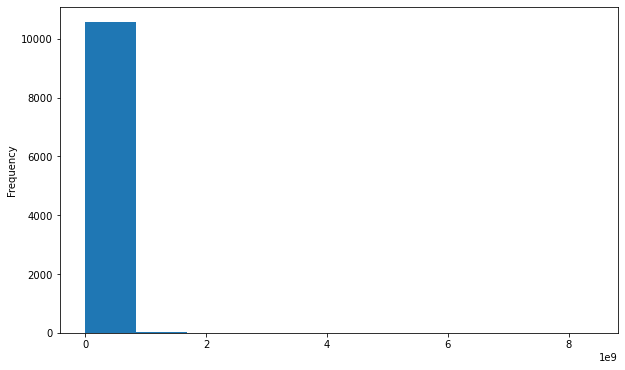

In [26]:
df['NormalizedAnnualCompensation'].plot(kind='hist', figsize=(10, 6))

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
